In [1]:
import numpy as np
import pickle
from visualization import *
from run_exp import *

In [2]:
!pip install pulp
!pip install joblib
import pulp

fastai 1.0.59 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
fastai 1.0.59 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# k_track, log_track, dist_track, sigma_x, accuracies = run_exp(iter=3)
# k_track, log_track, dist_track, sigma_x, accuracies = run_exp(iter=3, sample="full")
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

In [2]:
from datetime import date
today = date.today().strftime("%m%d%y")

run = 50
it = 50
a = 30
samp = "B" # "Z"
dnew = "r" # "w"
path = "output/exp_result/sampleB_random/" + today + "_r" + str(run) + "_it" + str(it) + "_a" + str(a) + '/'

import os
if not os.path.exists(path):
    os.makedirs(path)

In [ ]:
from joblib import Parallel, delayed
Parallel(n_jobs=3)(delayed(run_exp)(sample=samp, iter=it, file_name= path+str(i+1), draw=dnew, alpha=a) for i in range(run))

In [3]:
# load results
n = 50
path = "output/exp_result/sampleB_random/031220_r50_it50_a15/031220_r50_it50_a15"

results = []
for i in range(1,n+1):
    results.append(pickle.load(open(path+str(i), 'rb')))

## plot - K v.s. loglike
compare the grows of log-likelihood with K (feature-counts) for 50 iterations.


0


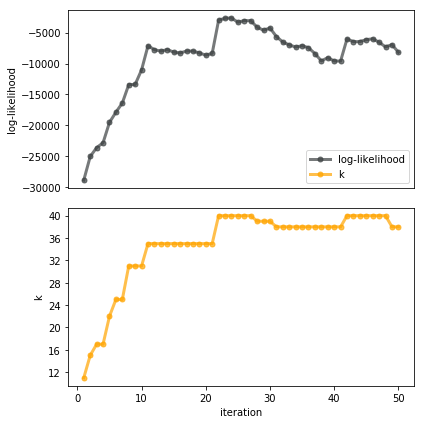

1


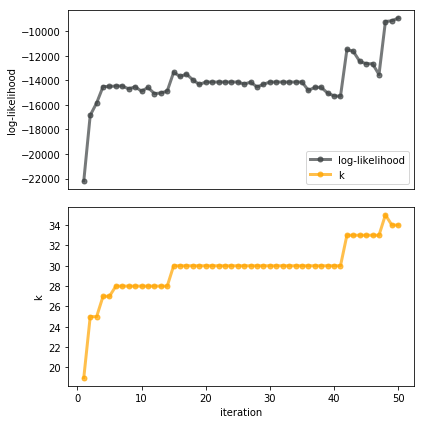

2


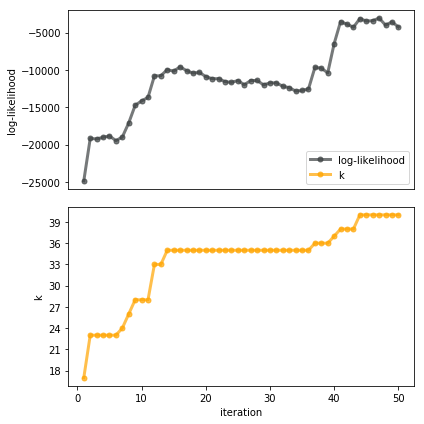

3


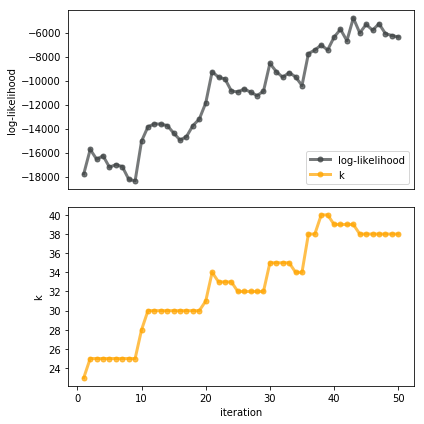

4


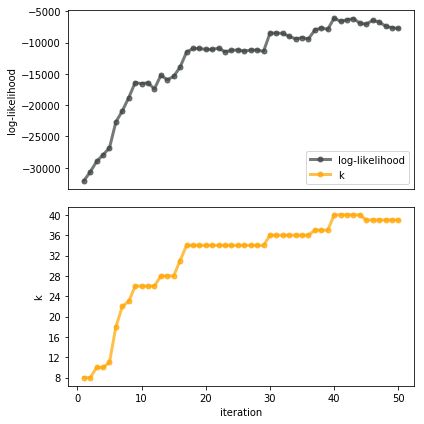

5


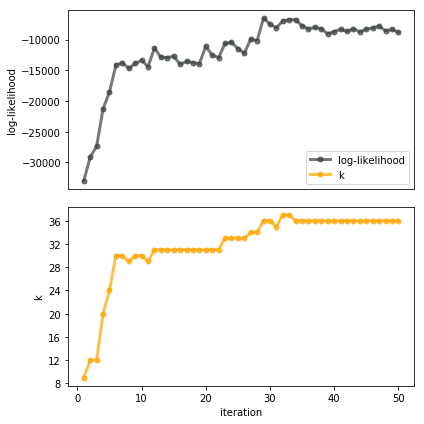

6


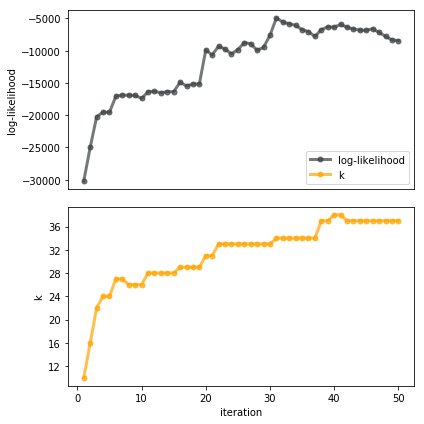

7


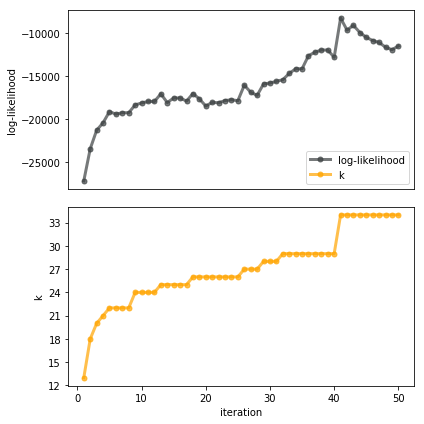

8


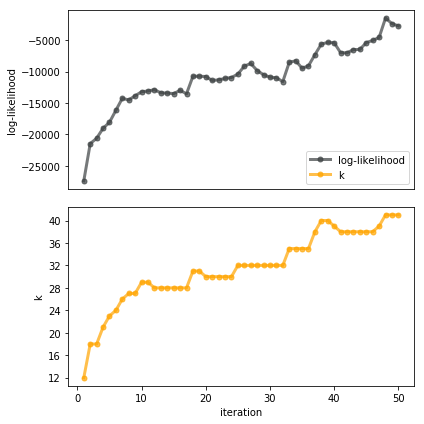

9


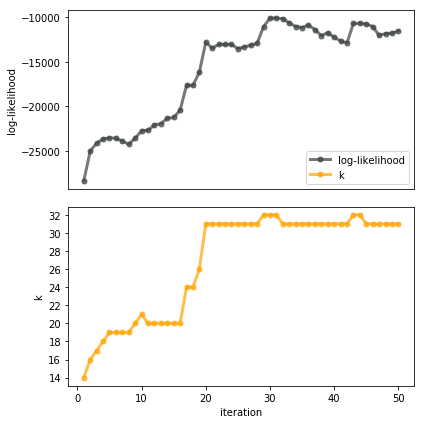

10


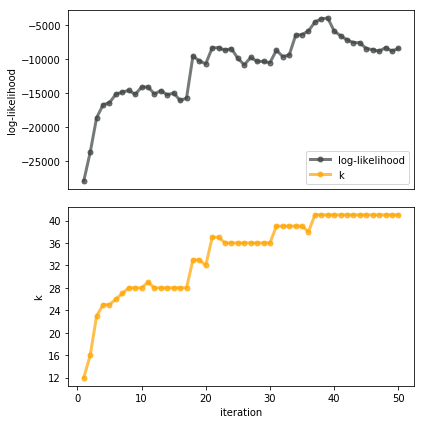

11


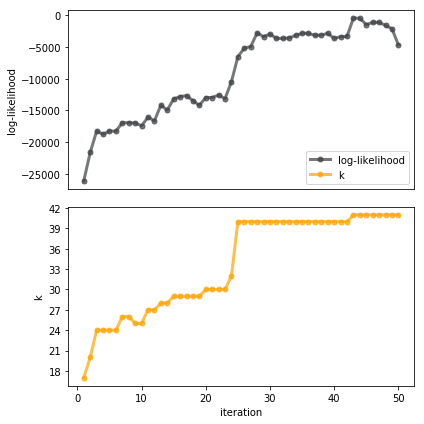

12


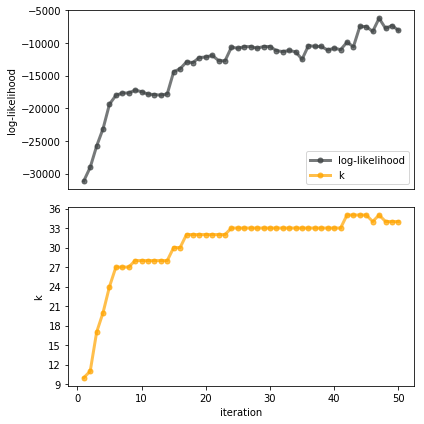

13


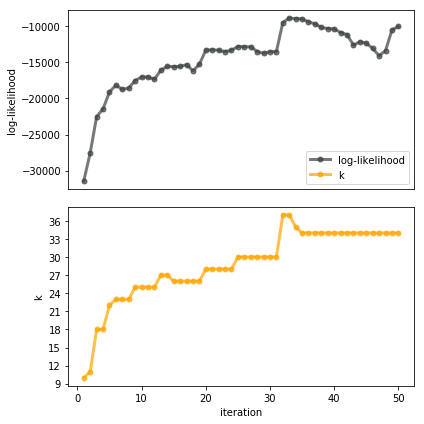

14


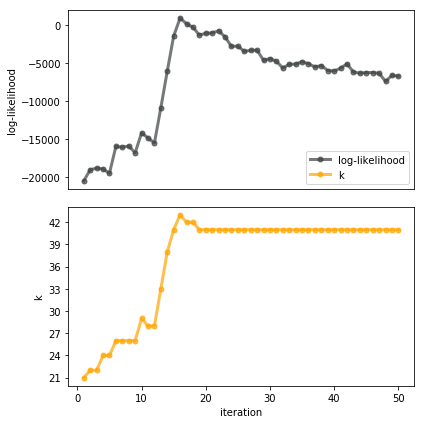

15


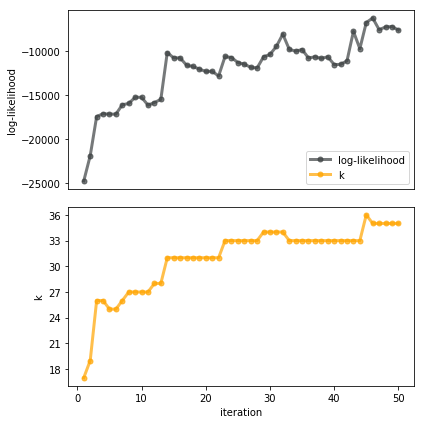

16


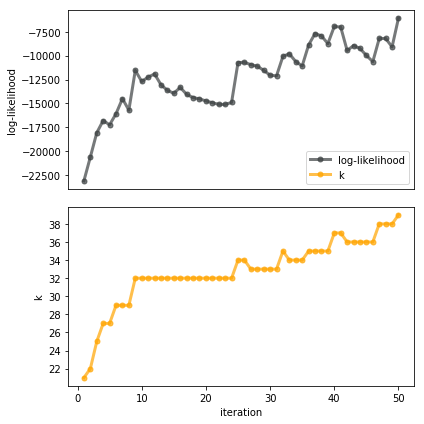

17


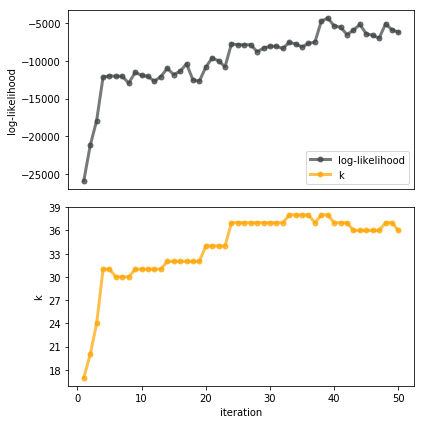

18


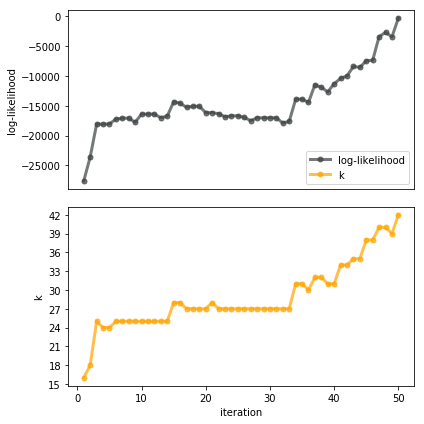

19


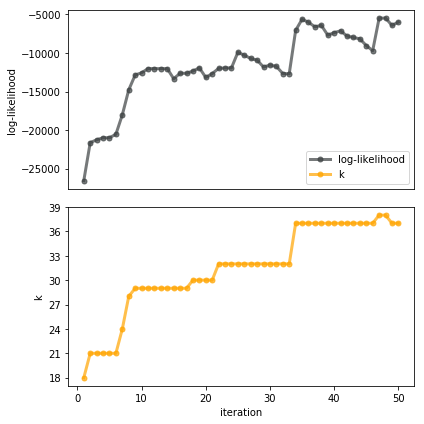

20


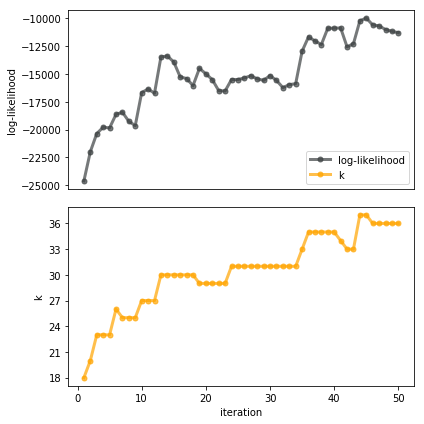

21


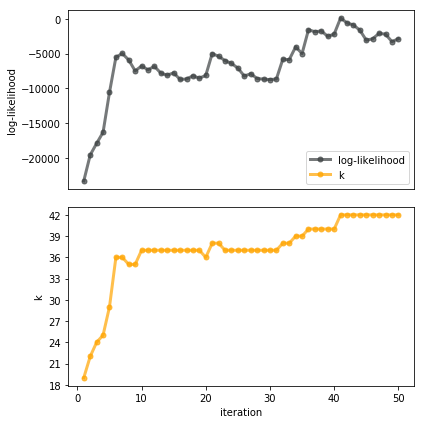

22


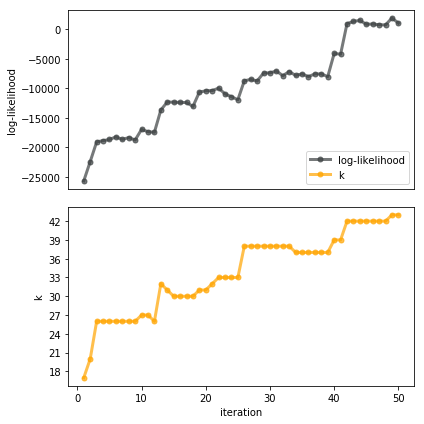

23


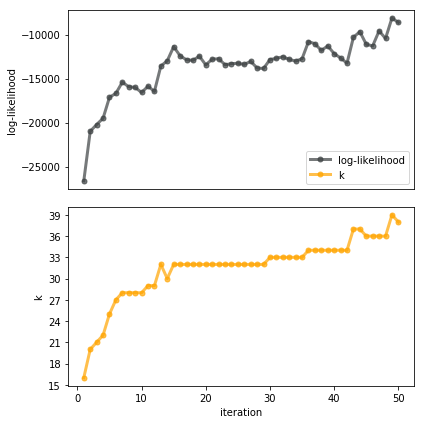

24


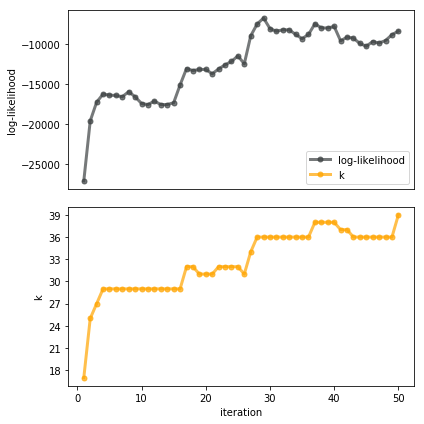

25


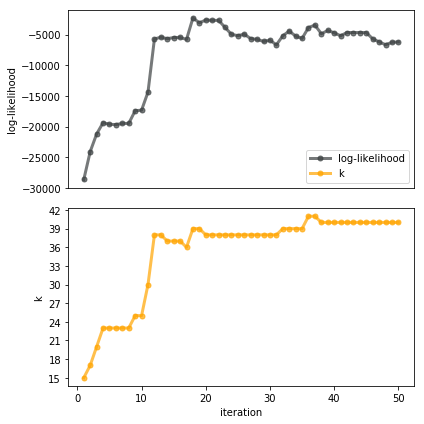

26


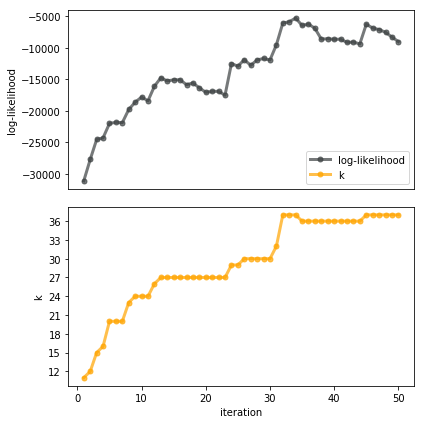

27


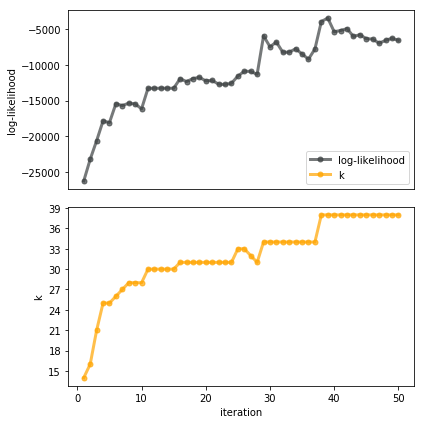

28


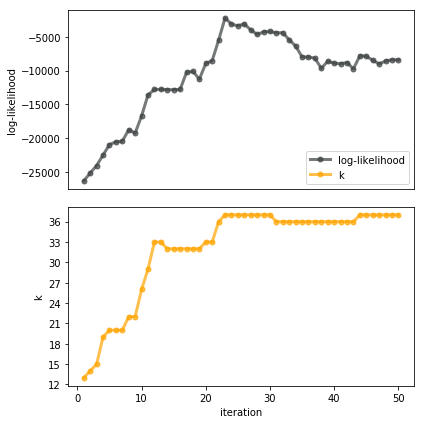

29


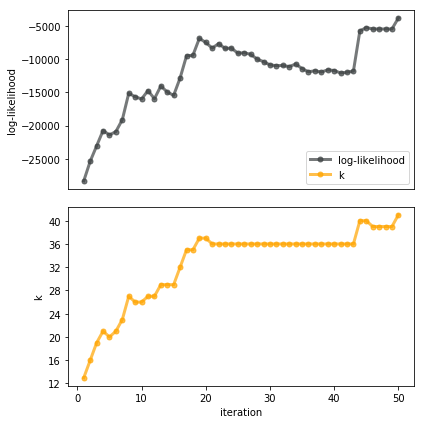

30


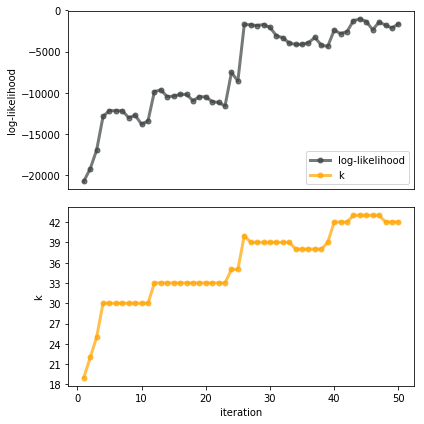

31


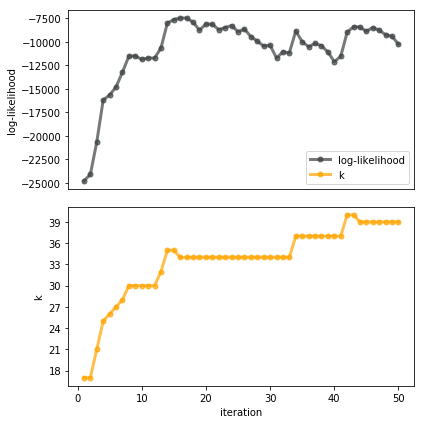

32


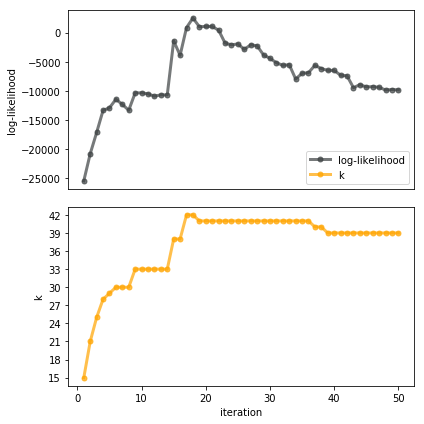

33


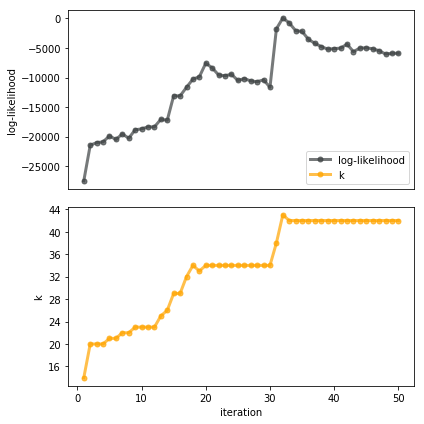

34


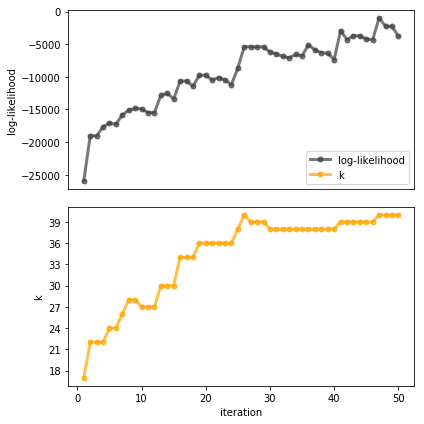

35


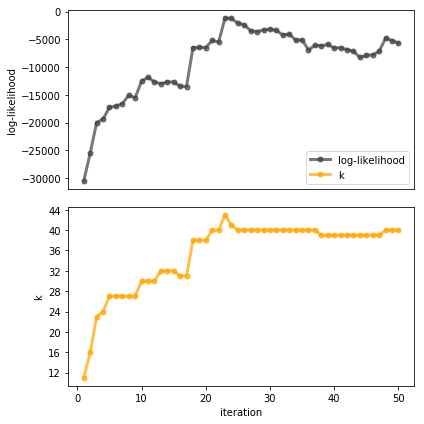

36


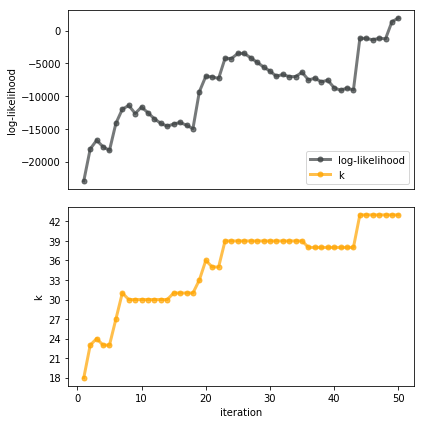

37


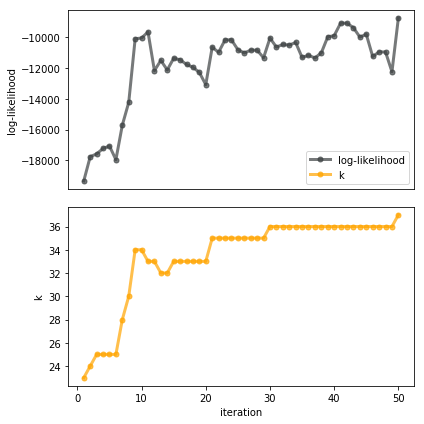

38


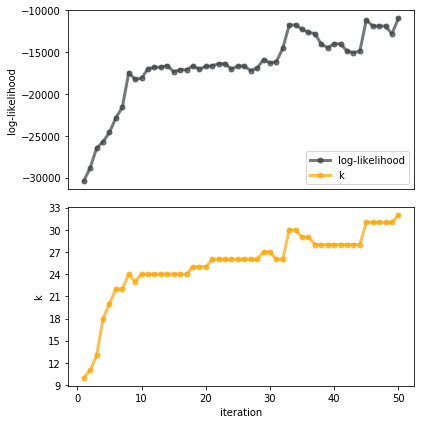

39


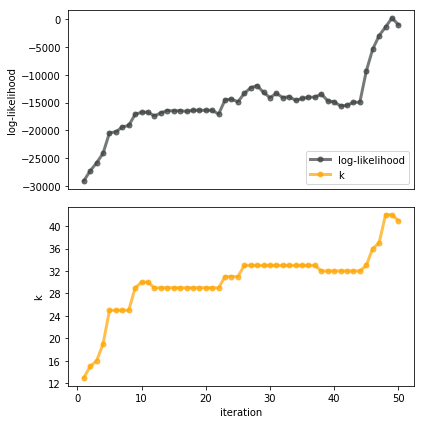

40


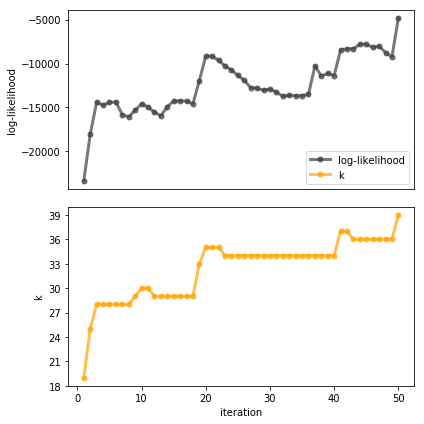

41


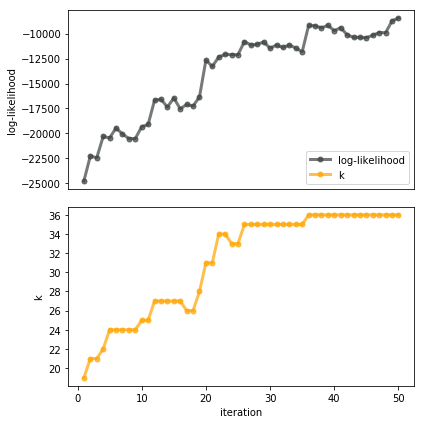

42


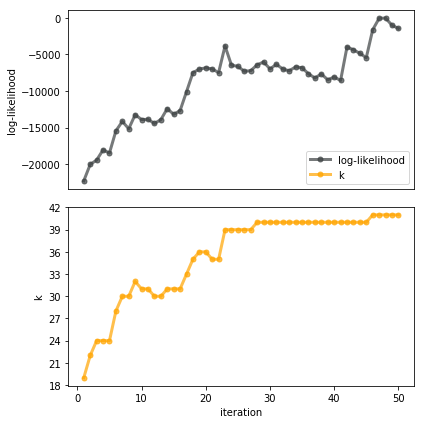

43


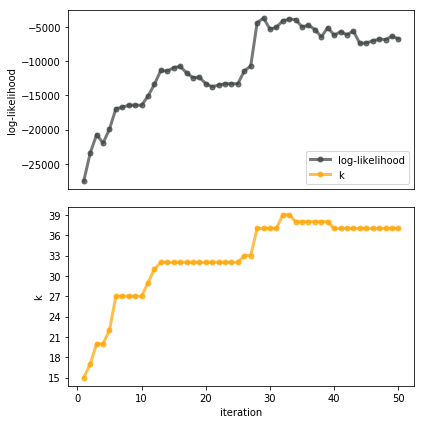

44


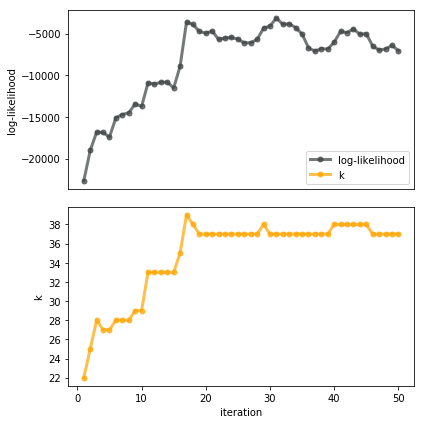

45


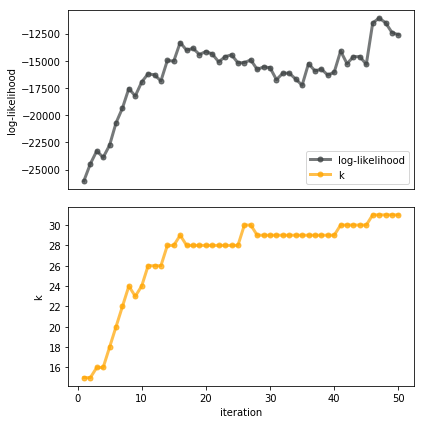

46


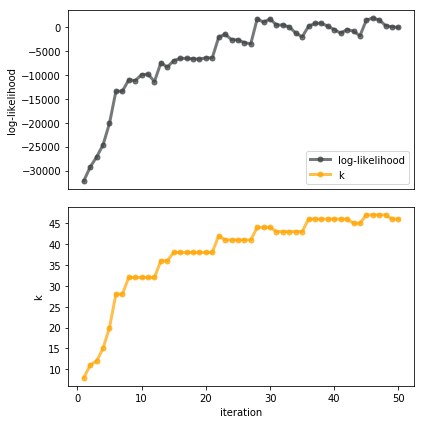

47


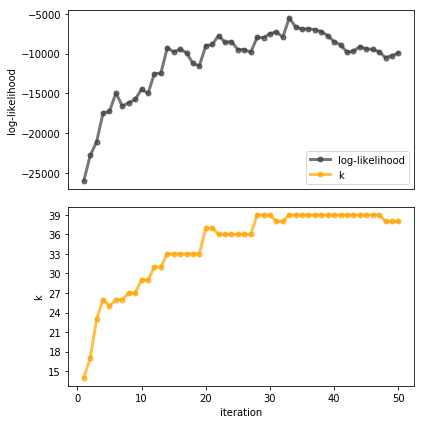

48


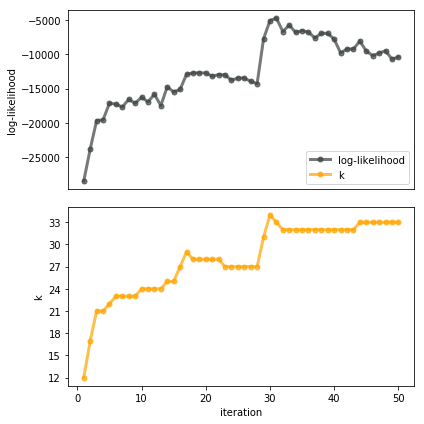

49


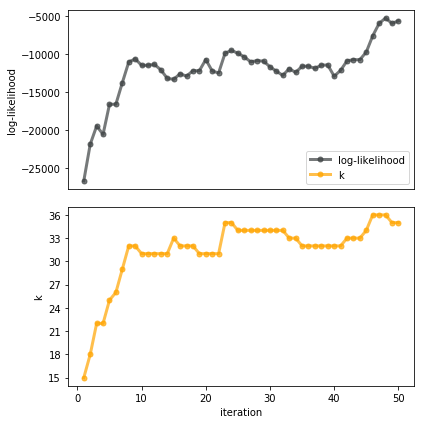

In [5]:
for i in range(n):
    print(i)
    plot_curve(results[i]['log_track'], results[i]['k_track'])

## Summarize in one plot

Take all previous results, and take the mean of all runs for each iteration.
Add std as error, to see how it differs.

In [4]:
log_all = [results[i]['log_track'] for i in range(n)]
k_all = [results[i]['k_track'] for i in range(n)]

log_mean = np.mean(log_all, axis=0)
k_mean = np.mean(k_all, axis=0)
log_std = np.std(log_all, axis=0)
k_std = np.std(k_all, axis=0)

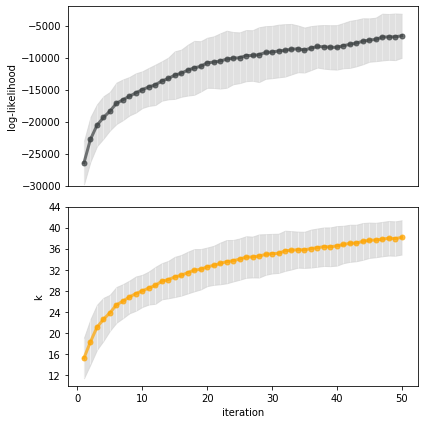

In [16]:
plot_curve(log_mean, k_mean, log_std, k_std, saveFile=True, fileName="plot-Brand", c1_lh=[-30000,-2000], c2_lh=[10,44])

## plot log-likelihood v.s. accuracy

compare the grows of log-likelihood with accuracy for 50 iterations.

In [17]:
# loglike V.S. accuracy
log_all = [results[i]['log_track'] for i in range(n)]
acc_all = [[results[j]['accuracies'][i][0] for i in range(it)] for j in range(n)]

log_mean = np.mean(log_all, axis=0)
acc_mean = np.mean(acc_all, axis=0)
log_std = np.std(log_all, axis=0)
acc_std = np.std(acc_all, axis=0)

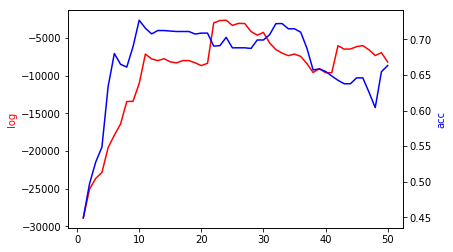

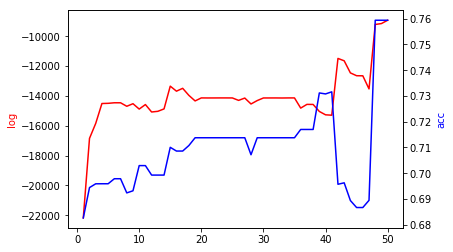

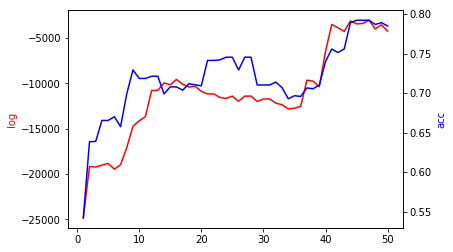

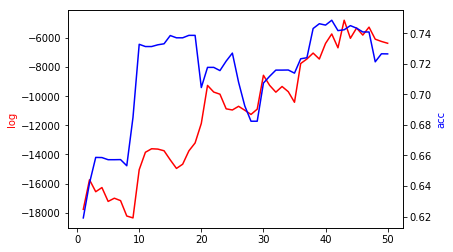

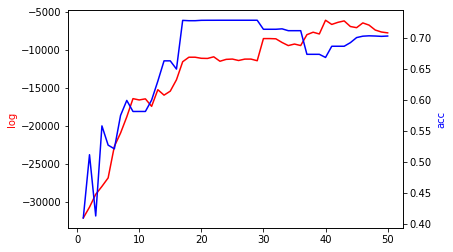

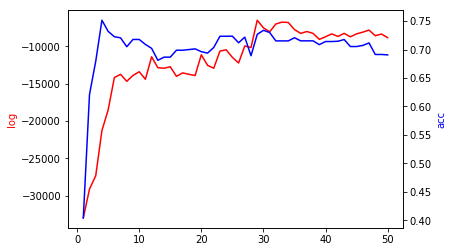

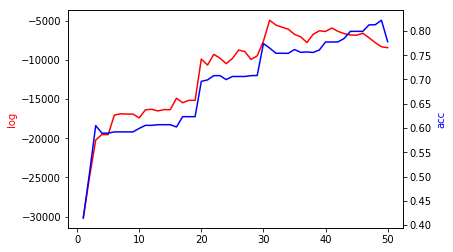

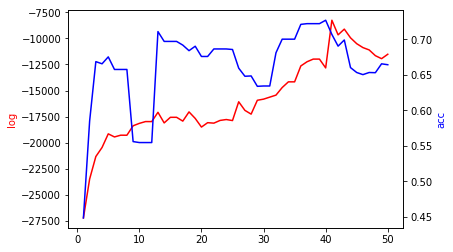

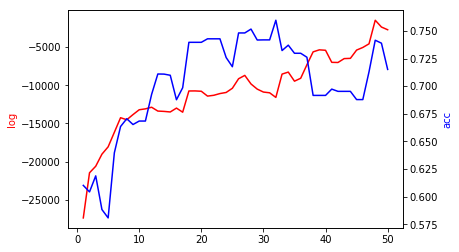

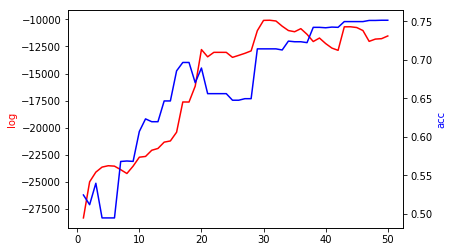

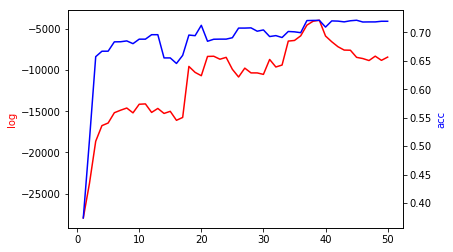

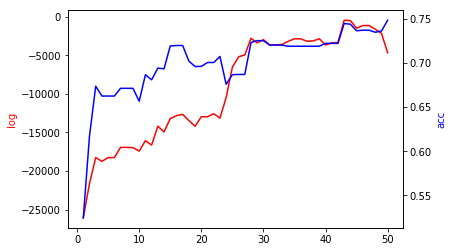

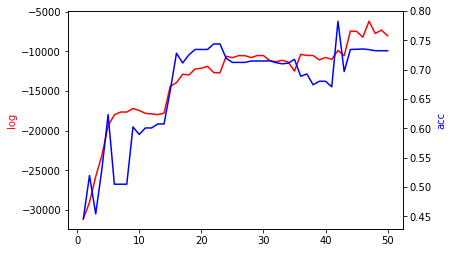

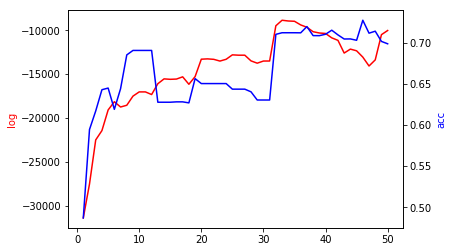

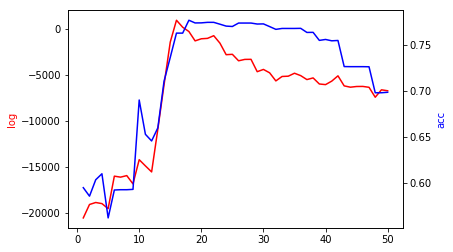

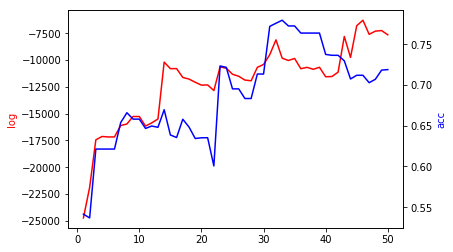

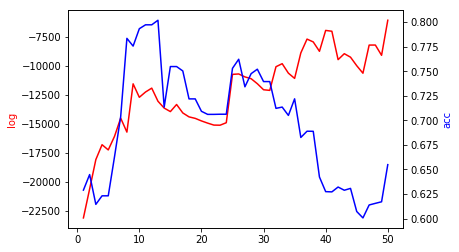

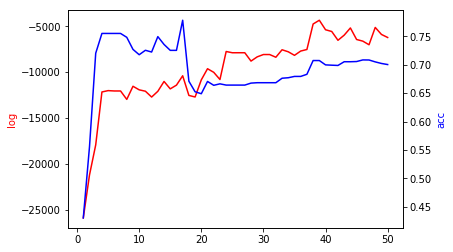

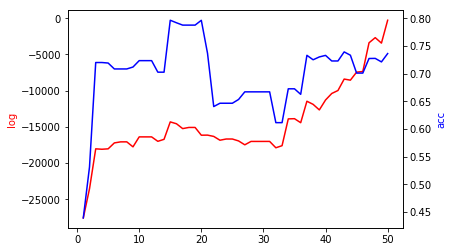

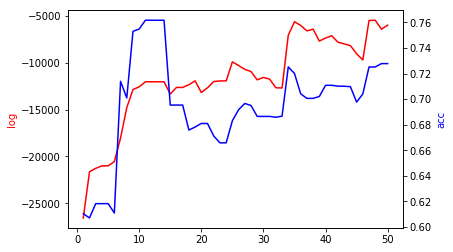

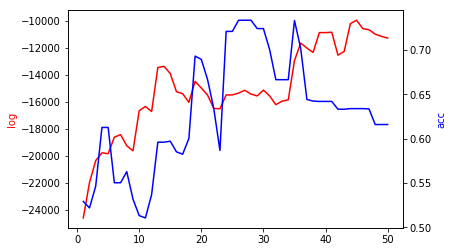

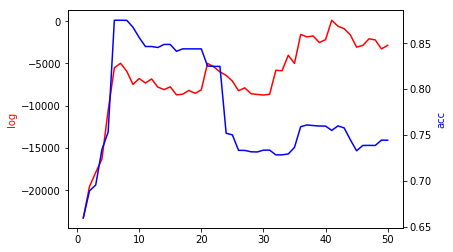

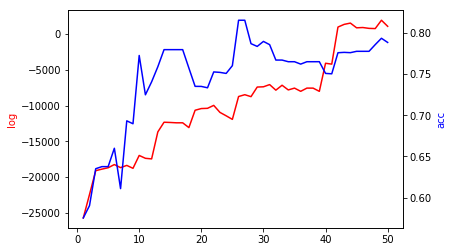

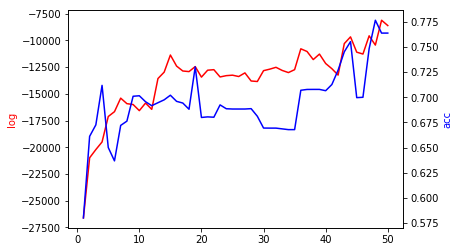

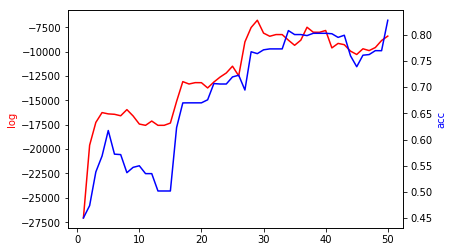

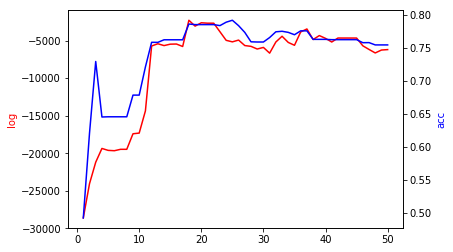

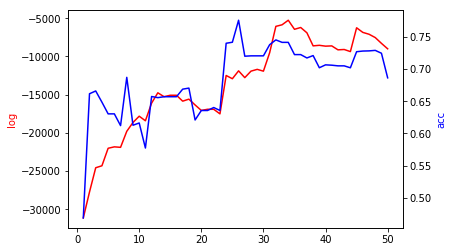

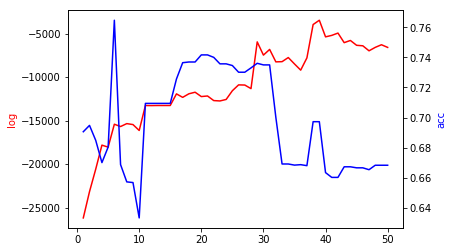

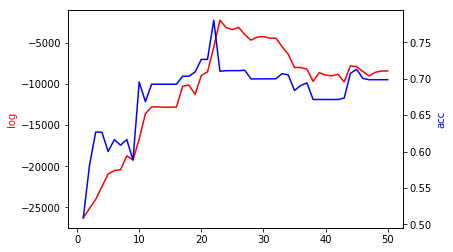

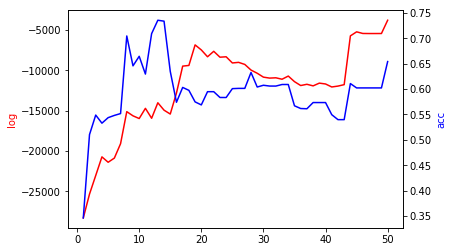

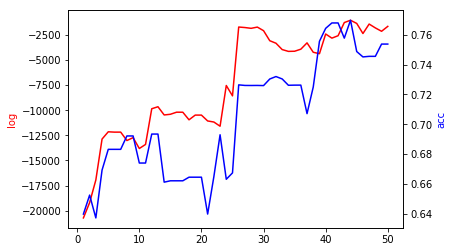

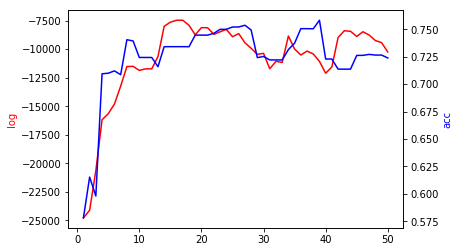

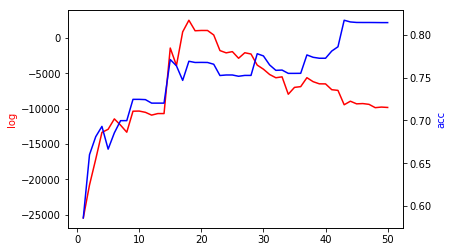

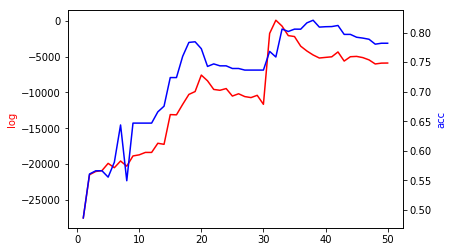

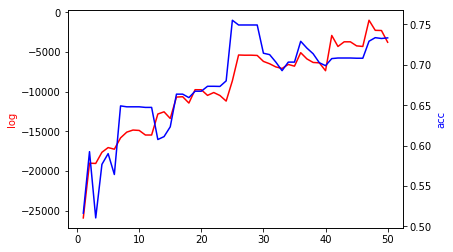

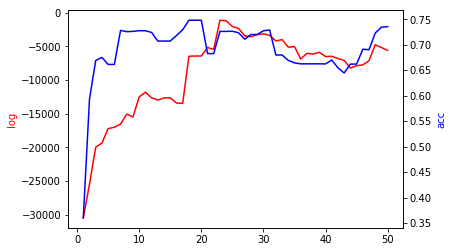

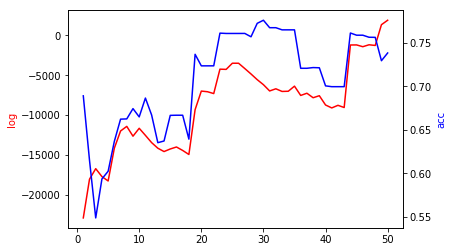

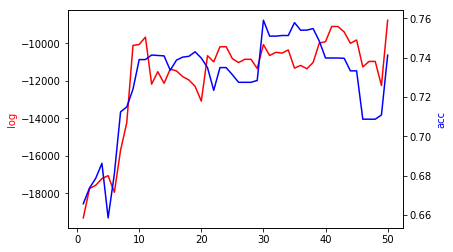

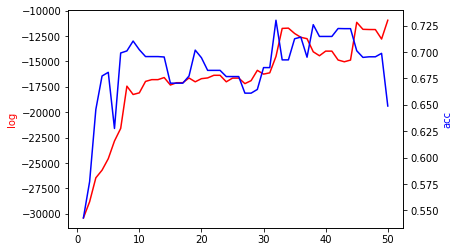

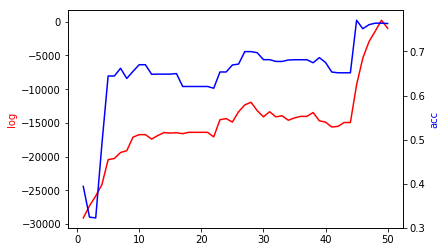

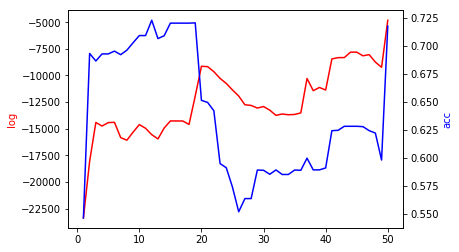

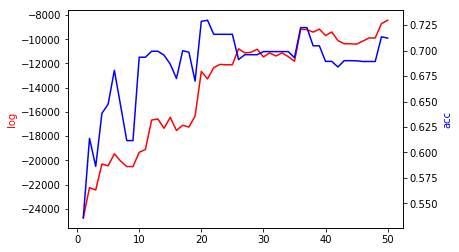

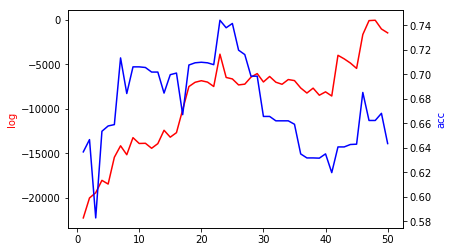

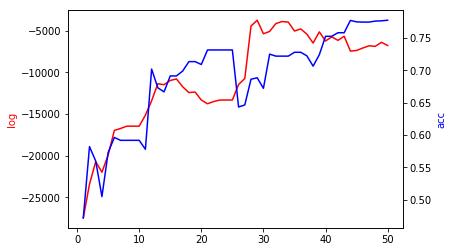

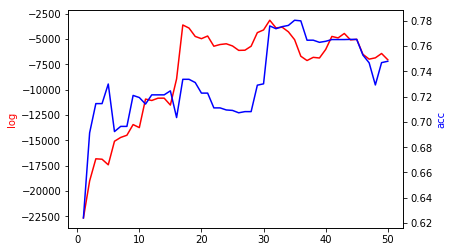

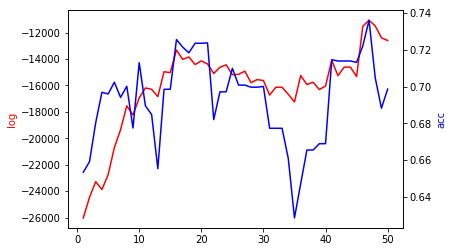

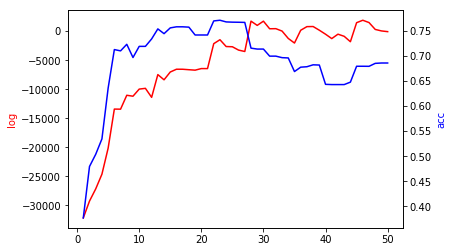

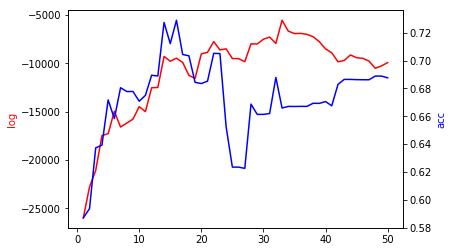

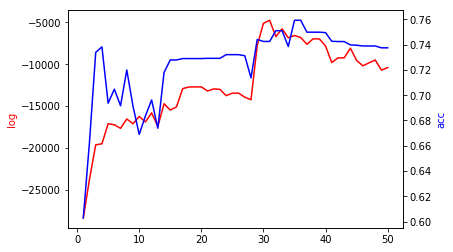

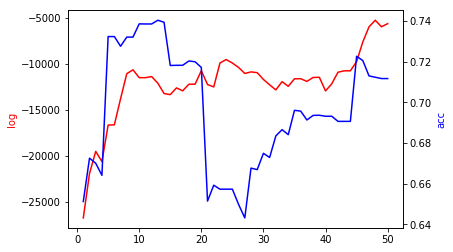

In [11]:
for i in range(n):
    index = [i for i in range(1,51)]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(index, log_all[i], 'r-')
    ax1.set_ylabel('log', color='r')
    ax1.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(index, acc_all[i], 'b-')
    ax2.set_ylabel('acc', color='b')
    ax2.grid(False)

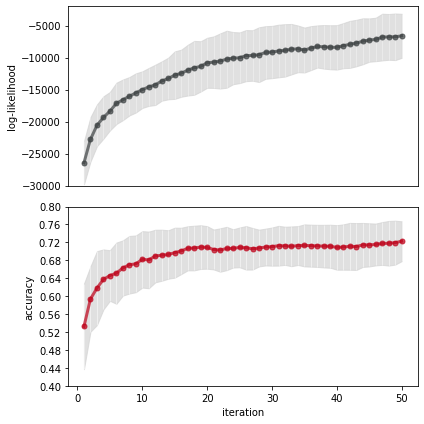

In [19]:
plot_curve2(log_mean, acc_mean, log_std, acc_std, saveFile=True, fileName="plot-Brand_acc", c1_lh=[-30000,-2000], c2_lh=[0.4,0.8])

In [19]:
print([results[i]['best_model']['best_iter'] for i in range(n)])
[results[i]['best_model']['best_accuracies'] for i in range(n)]

[9, 47, 44, 40, 19, 3, 48, 39, 31, 48, 44, 49, 41, 45, 17, 32, 12, 16, 19, 10, 25, 5, 25, 47, 49, 24, 25, 5, 21, 12, 43, 38, 42, 37, 24, 17, 29, 29, 31, 44, 49, 20, 22, 49, 34, 46, 22, 15, 35, 9]


[(0.7268666666666667, 0.7252),
 (0.7594166666666666, 0.7606),
 (0.7921833333333334, 0.7953),
 (0.7485333333333334, 0.7432),
 (0.7283333333333334, 0.7301),
 (0.7514666666666666, 0.7583),
 (0.8220166666666666, 0.8201),
 (0.7271666666666666, 0.7303),
 (0.7596666666666667, 0.7598),
 (0.7515166666666667, 0.7506),
 (0.72105, 0.7197),
 (0.7482, 0.7512),
 (0.78235, 0.783),
 (0.7270166666666666, 0.7218),
 (0.7767666666666667, 0.7735),
 (0.77965, 0.7755),
 (0.80195, 0.802),
 (0.7782, 0.7826),
 (0.7964, 0.7936),
 (0.7617333333333334, 0.7606),
 (0.7333666666666666, 0.7337),
 (0.8751, 0.8809),
 (0.8152833333333334, 0.8166),
 (0.7765666666666666, 0.7736),
 (0.8276333333333333, 0.83),
 (0.7920166666666667, 0.7881),
 (0.7755166666666666, 0.783),
 (0.7647166666666667, 0.767),
 (0.7802833333333333, 0.7757),
 (0.7353, 0.7452),
 (0.7697166666666667, 0.7658),
 (0.7582166666666666, 0.7571),
 (0.81735, 0.8149),
 (0.8209666666666666, 0.8182),
 (0.75525, 0.7522),
 (0.7478833333333333, 0.7482),
 (0.7758, 0.7793

In [13]:
all_best = [results[i]['best_model']['best_accuracies'][0] for i in range(n)]
all_iter = [results[i]['best_model']['best_iter'] for i in range(n)]
all_k = [results[i]['best_model']['best_k'] for i in range(n)]
best = np.argmax(all_best)
best_result = results[best]['best_model']
best_it = best_result['best_iter']
best_acc = best_result['best_accuracies'][0]
best_features = best_result['best_features']
best_k = best_result['best_k']


In [14]:
print("The best result is in run {}, iteration {}, with accuracy {} (K = {})".format(best, best_it, best_acc, best_k))
print("avg acc: {}".format(np.mean(all_best)))
print("avg iter: {}".format(np.mean(all_iter)))
print("avg k: {}".format(np.mean(all_k)))

The best result is in run 21, iteration 5, with accuracy 0.8751 (K = 36)
avg acc: 0.766104
avg iter: 29.72
avg k: 34.7


## plot best features

[3, 3, 2, 4, 4, 1, 1, 3, 2, 3, 2, 3, 3, 2, 2, 1, 1, 2, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


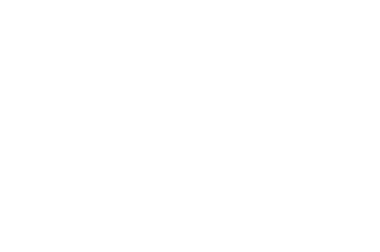

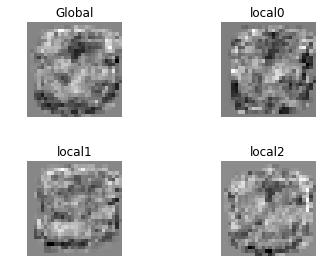

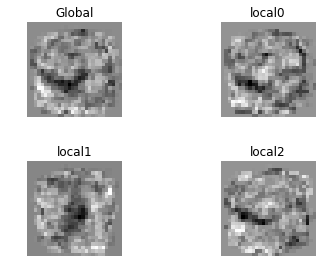

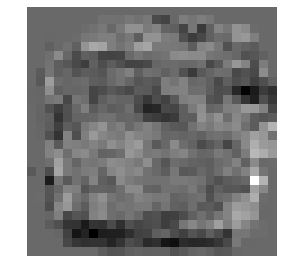

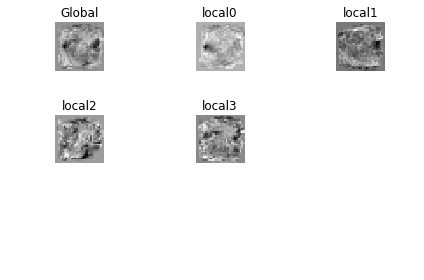

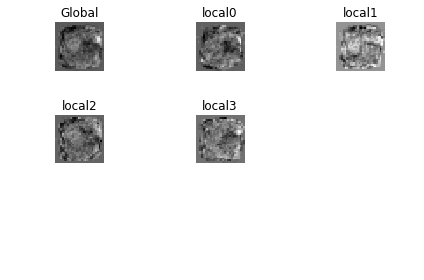

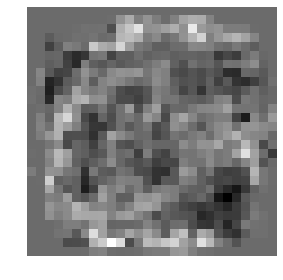

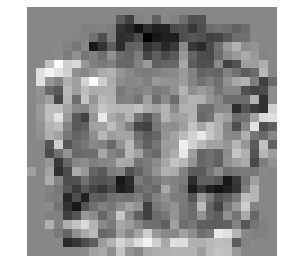

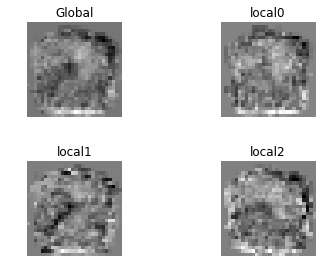

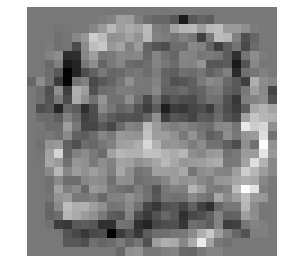

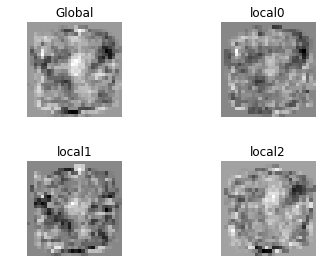

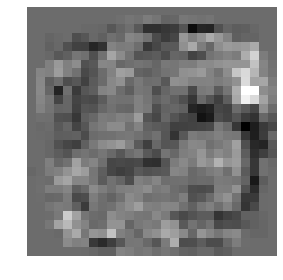

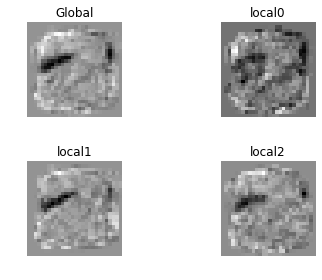

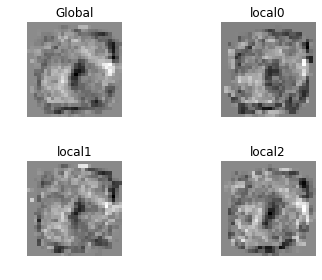

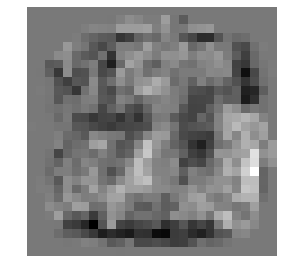

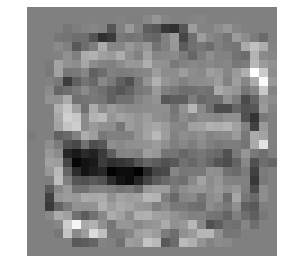

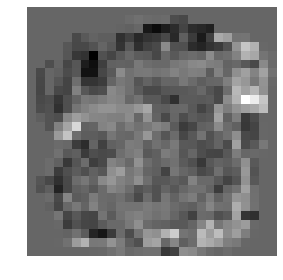

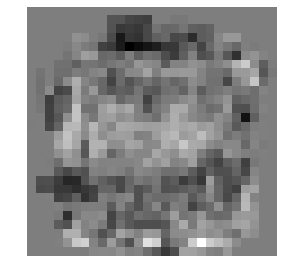

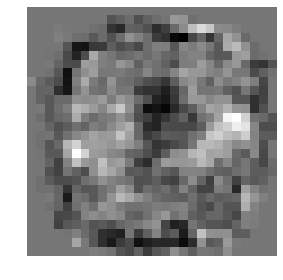

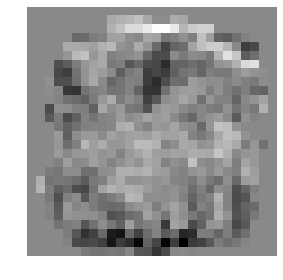

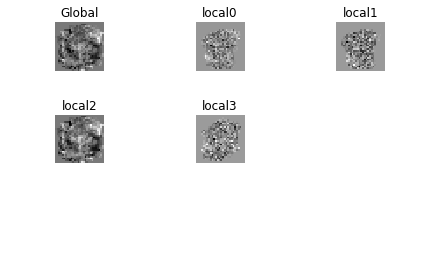

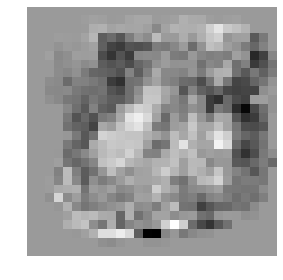

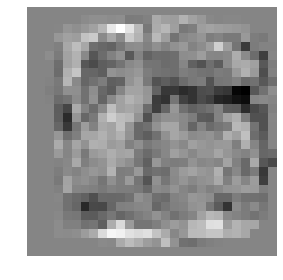

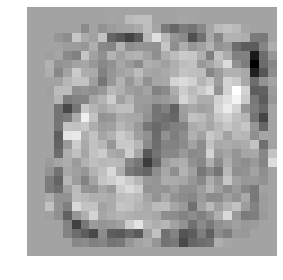

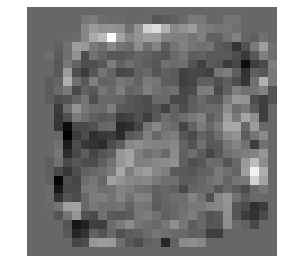

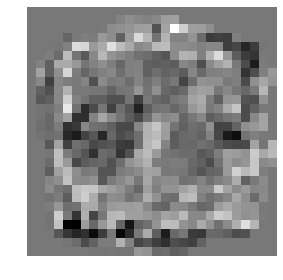

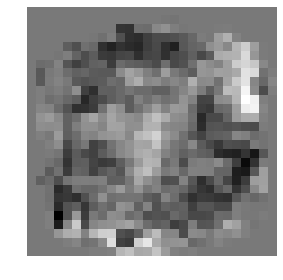

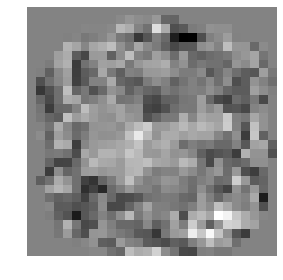

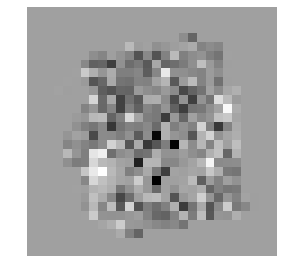

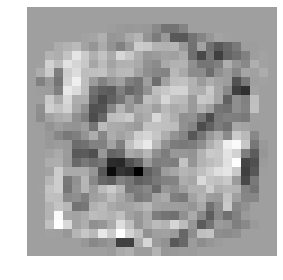

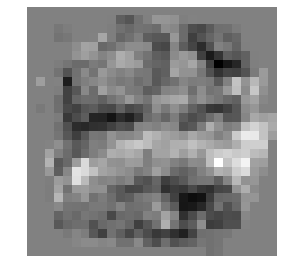

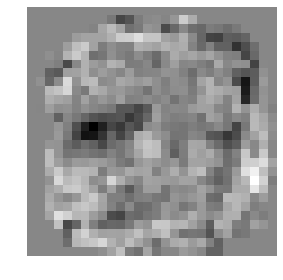

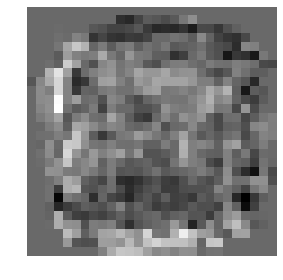

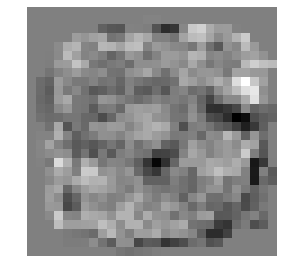

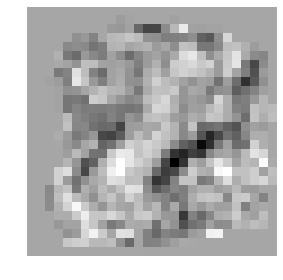

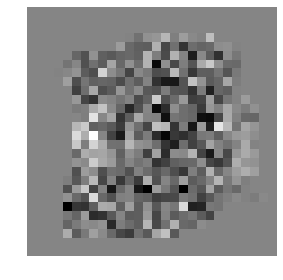

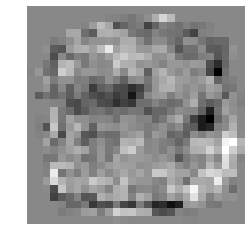

In [22]:
print(best_result['best_dist'])
prep_features = prep_group(best_features)
plot_all(prep_features)